In [10]:
import pandas as pd
import numpy as np

path = "/data/home/gkeren/TravelRAG/src/eval_results/UseCase2_location_identifier/results_with_human_labels.csv"
df = pd.read_csv(path)
df

,id,full_answer,answer,retrieved_answer,true_answer,correct_by_llm,correct_by_human,correct_type,correct_country,start_time,end_time,response_by,use_case
0,0.0,It looks like your picture is from the stunnin...,['morocco Chefchaouen Medina'],['morocco Chefchaouen Medina'],Africa Morocco Chefchaouen Medina,False,True,True,True,42:12.3,42:19.7,RAG,2
1,NaN,It seems like your picture was taken in the be...,"{'name': 'Chefchaouen', 'location': 'Morocco'}",NaN,Africa Morocco Chefchaouen Medina,True,True,True,True,42:20.2,42:27.9,Generative Model,2
2,1.0,It looks like your picture is from the Cathedr...,['Cathedral of St. Michael and St. Gudula Brus...,['Cathedral of St. Michael and St. Gudula Brus...,"Africa Nigeria Cathedral Church of Christ, Marina",False,False,True,False,42:28.4,42:35.1,RAG,2
3,NaN,Hi 1!\n\nIt looks like your picture is from St...,"{'name': 'St. Andrew's Cathedral', 'location':...",NaN,"Africa Nigeria Cathedral Church of Christ, Marina",False,False,True,False,42:35.6,42:44.6,Generative Model,2
4,2.0,It looks like your picture is from the Lekki C...,['nigeria Lekki Conservation Centre'],['nigeria Lekki Conservation Centre'],Africa Nigeria Lekki Conservation Centre,False,True,True,True,42:45.1,42:51.7,RAG,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,NaN,Hi 97! It looks like your picture is from Mach...,"{'name': 'Machu Picchu', 'location': 'Peru'}",NaN,South America Peru Machu Picchu,True,True,True,True,30:59.6,31:06.7,Generative Model,2
202,98.0,It looks like your picture is from the Dhankar...,[' Dhankar Gompa Monastery in Spiti Valley – H...,[' Dhankar Gompa Monastery in Spiti Valley – H...,South America Peru Ollantaytambo Village,False,False,False,False,31:12.1,31:18.3,RAG,2
203,NaN,Hi 98! \n\nIt looks like your picture is from ...,"{'name': 'Ollantaytambo', 'location': 'Peru'}",NaN,South America Peru Ollantaytambo Village,True,True,True,True,31:23.7,31:31.1,Generative Model,2
204,99.0,It looks like your picture is from the Metropo...,['mexico Mexico City Metropolitan Cathedral'],['mexico Mexico City Metropolitan Cathedral'],South America Peru The White City of Arequipa,False,False,False,False,31:36.6,31:42.7,RAG,2


# calc aggreement

In [11]:
# Sample 20% of the rows
sampled_df = df.sample(frac=0.2, random_state=42)

# Calculate the agreement rate between 'correct_by_llm' and 'correct_by_human'
agreement = np.mean(sampled_df['correct_by_llm'] == sampled_df['correct_by_human'])

agreement

0.6341463414634146

In [12]:
agreement = np.mean(df['correct_by_llm'] == df['correct_by_human'])
agreement

0.6699029126213593

# calc accuracy

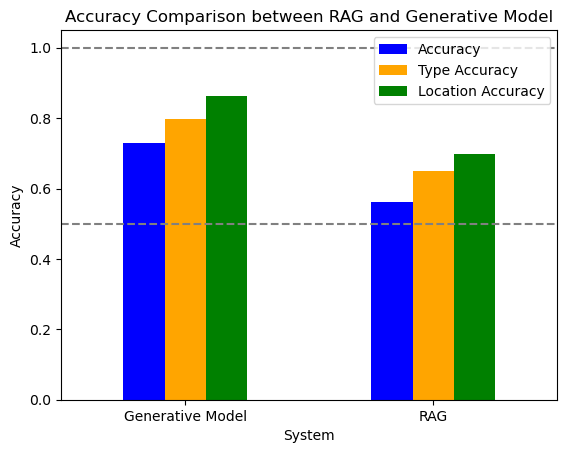

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# 1.1 Accuracy calculation
accuracy = df.groupby('response_by')['correct_by_human'].mean()

# 1.2 Type accuracy calculation
type_accuracy = df.groupby('response_by')['correct_type'].mean()

# 1.3 Location accuracy calculation
location_accuracy = df.groupby('response_by')['correct_country'].mean()

# Combine the results into a single DataFrame for plotting
accuracy_df = pd.DataFrame({
    'Accuracy': accuracy,
    'Type Accuracy': type_accuracy,
    'Location Accuracy': location_accuracy
}).reset_index()

# 2. Plotting the accuracy values
accuracy_df.plot(x='response_by', kind='bar', stacked=False, color=['blue', 'orange', 'green'])
plt.title('Accuracy Comparison between RAG and Generative Model')
plt.ylabel('Accuracy')
plt.xlabel('System')
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.axhline(y=1, color='gray', linestyle='--')
plt.axhline(y=0.5, color='gray', linestyle='--')
plt.savefig('/data/home/gkeren/TravelRAG/src/eval_results/UseCase2_location_identifier/accuracy_comparison.pdf')
plt.show()

In [24]:
rag_wrong = df[(df['response_by'] == 'RAG') & (df['correct_by_human'] == 0)][['correct_type', 'correct_country', 'answer', 'true_answer']]
rag_wrong

,correct_type,correct_country,answer,true_answer
2,True,False,['Cathedral of St. Michael and St. Gudula Brus...,"Africa Nigeria Cathedral Church of Christ, Marina"
8,True,False,['Cathedral of St. Michael and St. Gudula Brus...,"Africa Nigeria Cathedral Church of Christ, Marina"
12,False,False,"['Goa Jomblang Cave, Java indonesia']",Africa Nigeria Ogbunike Cave
14,False,False,['thailand Khao Yai National Park'],Africa South Africa Blyde River Canyon
20,False,False,"['Ulun Danu Beratan, Bali indonesia']",Asia China Summer Palace china
22,False,True,['Temple of Heaven china'],Asia China The Forbidden City china
24,False,False,"['Akrotiri Ruins, Santorini']",Asia China The Terracotta Army Museum china
36,True,False,['new york Chelsea Market'],Asia Israel Mahane Yehuda Market
38,False,False,['Times Square new york'],Asia Japan Takeshita Dori tokyo japan
42,False,True,['thailand Doi Inthanon National Park'],Asia Thailand Big Buddha Phuket


In [21]:
rag_wrong['correct_country'].mean(), rag_wrong['correct_type'].mean()

(0.3111111111111111, 0.2)

In [22]:
gen_wrong = df[(df['response_by'] == 'Generative Model') & (df['correct_by_human'] == 0)][['correct_type', 'correct_country', 'true_answer']]
gen_wrong

,correct_type,correct_country,true_answer
3,True,False,"Africa Nigeria Cathedral Church of Christ, Marina"
5,False,False,Africa Nigeria Lekki Conservation Centre
9,True,False,"Africa Nigeria Cathedral Church of Christ, Marina"
11,False,False,Africa Nigeria Lekki Conservation Centre
13,False,False,Africa Nigeria Ogbunike Cave
53,True,False,Asia Vietnam Ban Gioc waterfalls
63,True,False,Europe Belgium Choco-Story Museum Bruges
83,True,False,Europe France Museum of Modern and Contemporar...
89,True,False,Europe Germany Imperial Hall Munich
99,False,True,Europe Iceland Laugavegur Reykjavik


In [23]:
gen_wrong['correct_country'].mean(), gen_wrong['correct_type'].mean()

(0.5, 0.32142857142857145)